# Drafts

This document contains cells or code snippets that I want to keep aside, but that are not used in the rest of the files anymore.

## Obtaining climate data manually from climatedata.ca

Since we're doing calibration simulation here, we don't have a particular place where our simulation take place. It's up to us to choose where the climate data comes from, and there is not a "best" way to do things.

It's surely most likely better to use climate conditions that are closer to the average of the conditions we want to simulate in other LANDIS-II simulation rather than to extremes (especially for this first step of calibration). We also want to make sure that the location we use ca be inputted in FVSon.

I propose that we use an area near the border between the boral and temperate forest, and near the center of Ontario. It will be arbitrary.

Here is a map from of the forests of Ontario from the 2016 forest report of Ontario :

![](https://files.ontario.ca/1a-forestregion-map_e_1.png)

The city of [Chapleau](https://www.openstreetmap.org/#map=12/47.8416/-83.4106) seems to be located near the limit between the boreal and temperate forest. I will use a 5x5 grid cell (the grid cells being defined in the form of [https://climatedata.ca/download/](https://climatedata.ca/download/)) to download the data. Here is what it looks like on [https://climatedata.ca/download/](https://climatedata.ca/download/) :

![](./ChapleauClimateDataDotCA_5x5GridCellsForAveraging.png)

<details>
<summary>🖼️ (Collapsible section) Click here to show what the download form on https://climatedata.ca/download/ looks like when filled.</summary>

![](Sceenshot_FormClimateCanadaDotCA_Chapleau5x5Download.png)

</details>

The resulting data is in the files located in ReferencesAndData/ClimateDataChapleauOntario

The following sections will load and edit this data to create the climate file needed for PnET.

### Climate Indices from Ouranos/Climate Canada and Their Meanings

1. **cdd**: Consecutive Dry Days. The maximum number of consecutive days with precipitation below a certain threshold (usually 1mm).
2. **cddcold_18**: Consecutive Dry Days (with temperature constraint). The maximum number of consecutive days with precipitation below a certain threshold (likely 1mm) *and* with a daily mean temperature below 18°C.
3. **dlyfrzthw_tx0_tn-1**: Daily Freeze-Thaw cycles. Counts the number of days where the maximum temperature (tx) is above 0°C and the minimum temperature (tn) is below -1°C.
4. **first_fall_frost**: Date of the first fall frost. The first day in the autumn/winter season when the temperature drops below freezing (0°C).
5. **frost_days**: Number of frost days. The number of days with a minimum temperature below 0°C.
6. **frost_free_season**: Length of the frost-free season. The number of days between the last spring frost and the first fall frost.
7. **gddgrow_0**: Growing Degree Days (base 0°C). A measure of heat accumulation, calculated by summing the daily difference between the average temperature and a base temperature (0°C) for days when the average temperature is above the base temperature.
8. **gddgrow_5**: Growing Degree Days (base 5°C). Same as above, but with a base temperature of 5°C.
9. **hddheat_18**: Heating Degree Days (base 18°C). A measure of how much heating is required for a building, calculated by summing the difference between a base temperature (18°C) and the daily average temperature for days when the average temperature is below the base temperature.
10. **ice_days**: Number of ice days. The number of days with a maximum temperature below 0°C.
11. **last_spring_frost**: Date of the last spring frost. The last day in the spring season when the temperature drops below freezing (0°C).
12. **nr_cdd**: Number of Cooling Degree Days. Not explicitly defined in the original list, but typically refers to the number of days requiring cooling.
13. **prcptot**: Total precipitation. The sum of all precipitation (rain, snow, etc.) over a given period.
14. **r10mm**: Number of heavy precipitation days. The number of days with precipitation of 10mm or more.
15. **r1mm**: Number of precipitation days. The number of days with precipitation of 1mm or more.
16. **r20mm**: Number of very heavy precipitation days. The number of days with precipitation of 20mm or more.
17. **rx1day**: Maximum 1-day precipitation. The highest amount of precipitation recorded on a single day within a given period.
18. **rx5day**: Maximum 5-day precipitation. The highest amount of precipitation recorded over a 5-day period within a given period.
19. **tg_mean**: Mean temperature. The average of the daily average temperatures.
20. **tn_mean**: Mean minimum temperature. The average of the daily minimum temperatures.
21. **tn_min**: Minimum temperature. The lowest daily minimum temperature recorded.
22. **tnlt_m15**: Number of days with minimum temperature less than -15°C.
23. **tnlt_m25**: Number of days with minimum temperature less than -25°C.
24. **tr_18**: Number of days with daily mean temperature greater than 18°C.
25. **tr_20**: Number of days with daily mean temperature greater than 20°C.
26. **tr_22**: Number of days with daily mean temperature greater than 22°C.
27. **tx_max**: Maximum temperature. The highest daily maximum temperature recorded.
28. **tx_mean**: Mean maximum temperature. The average of the daily maximum temperatures.
29. **txgt_25**: Number of days with maximum temperature greater than 25°C.
30. **txgt_27**: Number of days with maximum temperature greater than 27°C.
31. **txgt_29**: Number of days with maximum temperature greater than 29°C.
32. **txgt_30**: Number of days with maximum temperature greater than 30°C.
33. **txgt_32**: Number of days with maximum temperature greater than 32°C.


#### Meaning of file names on the server of Climate Data Canada

https://en.wikipedia.org/wiki/Health_regions_of_Canada

Some .nc files (containing data about a climate variable) are indicated as spatially averaged for different things. For example, these files [here](https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/catalog/birdhouse/disk2/cccs_portal/indices/Final/CanDCS-M6/tx_max/MS/ssp126/ensemble_percentiles/catalog.html) :

```
tx_max_mon_MBCn+PCIC-Blend_historical+ssp126_1950-2100_spatialAvgCensus_percentiles.nc
tx_max_mon_MBCn+PCIC-Blend_historical+ssp126_1950-2100_spatialAvgHealth_percentiles.nc
tx_max_mon_MBCn+PCIC-Blend_historical+ssp126_1950-2100_spatialAvgWatershed_percentiles.nc
```

- Census refers to [census regions of Canada](https://en.wikipedia.org/wiki/Census_geographic_units_of_Canada)
- Health refers to [health regions of Canada](https://en.wikipedia.org/wiki/Health_regions_of_Canada)
- Watersheds refers to the [watersheds of Canada](https://en.wikipedia.org/wiki/Watersheds_of_North_America)

Instead, I've attempted to create a Generalized Additive Model (GAM) to predict PAR (downwelling shortwave radiation or rsds in CanLEADv1) from Tmin, Tmax and Precipitations. I've used a script on the clusters on compute Canada (since the data is large). See [`job_script_ClimateDataProcessing_ONLYPOLYGON_INTERACTIONS.sh`](./ReferencesAndData/job_script_ClimateDataProcessing_ONLYPOLYGON_INTERACTIONS.sh).

The script reads .nc files for Tmin, Tmax, Precipitations and PAR from one of the replicates of CanLEADv1 ([here](https://crd-data-donnees-rdc.ec.gc.ca/CDAS/products/CanLEADv1/CanRCM4-EWEMBI-MBCn/r1_r1i1p1/)) and the polygon delimitating the Chapleau area ([`ChapleauBoundariesClimate.shp`](./ReferencesAndData/ChapleauBoundariesClimate.shp)). It then gathers the data for each variables inside the polygon, upsamples them from daily to monthly, puts all simultaneous observations of the 4 variables in every cell in a dataframe, and then creates a GAM. Plots are then produced to check the residuals and predictions of the GAM for verification.

The verification plot shows obvious biases in the residuals, indicating that the model fails to capture some of the variability properly; in particular, higher values of radiation are associated with higher residuals. Still, the fit of the model looks pretty good. Sadly, I don't see any better alternatives for now : 

![](./ReferencesAndData/PAR_GAM_Validation/residuals_vs_predicted.png)

WIP : Improving these GAMs with GAMMs (mixed effects for temporal and spatial autocorrelation) and maybe Tweedie distribution rather than the one used here.
Idea : Make one python and one R script to deploy on compute Canada; more models and functions in R. Python script (based on current scripts) reads, upsamples the data, then outputs to .csv. R make the models and creates the plot. Run it through interactive session and in current folder to try several models iteratively. Might switch Python script to R to test better upsampling.

We need PAR in the right format, but also for future conditions - as it can be influenced by clouds.


- MODIS data available at https://lpdaac.usgs.gov/products/mcd18c2v062/ ; but changes every 3 hours, is taken from satellite data => might have low quality data at some points. Might need something cleaner, and maybe already expressed monthly.
- https://essd.copernicus.org/articles/14/2007/2022/ describes a data set that seems more historical and cleaner than MODIS, but also in 3hours format, from 1984-01-01 to 2018-12-31. Download is made via FTP, meaning that might be able to automatize the process.

Other datasets are referenced in the intro. Havent found the best yet.

PnET User guide : https://cida.usgs.gov/thredds/catalog.html?dataset=cida.usgs.gov/macav2metdata_m onthly_historical . But not sure if still active.
The Thredds server is not active anymore, but I was able to use the code provided to access the data :

```python
import fsspec
import xarray as xr
import s3fs
import zarr
import dask
import cftime

zarr_url = 's3://mdmf/gdp/macav2_historical_monthly.zarr/'

fs = fsspec.filesystem('s3', anon=True, endpoint_url='https://usgs.osn.mghpcc.org/')

ds = xr.open_dataset(fs.get_mapper(zarr_url), engine='zarr', 
                             backend_kwargs={'consolidated':True}, chunks={})

print(ds.summary)
```

Sadly, this data is for the contiguous USA only; so we have to look elsewhere.

we could go with a statistical approach - use existing PAR data to build a statistical model for our landscape linking PAR to over variables we have (precipitations, temperature). A quick search seems to say that such model might have errors of 3-4 MJ/m2/day, while data of PAR in Canada can range from (here for canadian prairies) :

    July (peak summer):
        Clear sky: 25–28 MJ/m²/day
        Partly cloudy: 18–22 MJ/m²/day
        Thunderstorm day: 8–12 MJ/m²/day
        
    January:
        Sunny day: 10–12 MJ/m²/day
        Snowstorm: 3–5 MJ/m²/day

So, 3-4 MJ/m2/day might be too much of an error. Or is it ? Maybe there will be much less error on local data. 

## Trying to replicate results from Brian's team - TO REMOVE WHEN DONE

The FVS curve I produced above seem a bit weird; plus, it doesn't match the data that Brian Sturtevant's team has sent me.

In this temporary section (to remove and to add later to a draft outside of Github repo), I try to replicate their results with FVS, but also those with PnET (as they kindly sent us PnET parameters).

In [1]:
# TRYING BRIAN'S PARAMETERS
# Parameters sent by Brian's team to help Junlong; should be the ones that generated their curves.
# Trying to see if their parameters match the curve from their document.

# Loading parameters and launching a simple PnET sim
from functionsForCalibration import *
import json


## FIRST SIM - INITIAL PARAMETERS DEFINED HERE

# Loading parameters from template
PnETGitHub_OneCellSim = parse_All_LANDIS_PnET_Files(r"./SimulationFiles/PnETGitHub_OneCellSim")
# Editing initial communities to only have single cohort of Abies Balsamea
del PnETGitHub_OneCellSim["initial-communities.txt"]["querrubr"]
del PnETGitHub_OneCellSim["initial-communities.txt"]["pinubank"]
PnETGitHub_OneCellSim["initial-communities.txt"]["abiebals"] = '1'

# Editing cell length so that one cell = 1ha
PnETGitHub_OneCellSim["scenario.txt"]["CellLength"] = 100
# Putting duration to 120 years
PnETGitHub_OneCellSim["scenario.txt"]["Duration"] = 240

# We load the initial parameters (see 3.Initial_Species_Parameters.ipynb)
with open('./SpeciesParametersSets/Initial/initialCoreSpeciesParameters.json', 'r') as json_file:
    coreSpeciesParameters = json.load(json_file)
with open('./SpeciesParametersSets/Initial/initialPnETSpeciesParameters.json', 'r') as json_file:
    PnETSpeciesParametersFinal = json.load(json_file)
with open('./SpeciesParametersSets/Initial/InitialGenericParameters.json', 'r') as json_file:
    genericParameters = json.load(json_file)

# We replace the dictionnaries from the template with the ones with the initial parameters
PnETGitHub_OneCellSim["species.txt"] = coreSpeciesParameters
PnETGitHub_OneCellSim["SpeciesParameters.txt"] = PnETSpeciesParametersFinal
PnETGitHub_OneCellSim["PnETGenericParameters.txt"] = genericParameters

# Writing parameters in temporary folder
testScenarioPath = "/tmp/TestScenarioPnET/"
if not os.path.exists(testScenarioPath):
    os.mkdir(testScenarioPath)
else:
    shutil.rmtree(testScenarioPath)
    os.mkdir(testScenarioPath)

write_all_LANDIS_files(testScenarioPath,
                       PnETGitHub_OneCellSim,
                       True)
# Running LANDIS-II sim
runLANDIS_Simulation("/tmp/TestScenarioPnET/",
                     "scenario.txt",
                    False,
                    5)
# Parsing outputs
result_sitesCSV_ParametersFromNotebook = parse_CSVFiles_PnET_SitesOutput("/tmp/TestScenarioPnET/Output/Site1",
                                                  int(PnETGitHub_OneCellSim["pnetsuccession.txt"]["StartYear"]))

Found : Additional file : !Run_scenario.bat
Found : PnET OutputBiomass parameter file : biomass.outputPnET.txt
Found : Climate file : climate.txt
Found : Disturbance Reduction File : disturbance_reductions.txt
Found : Additional file : ecoregion.img
Found : Main ecoregions file : ecoregion.txt
Found : PnET Ecoregion parameter file : EcoregionParameters.txt
Found : Additional file : initial-communities.img
Found : Initial Communities file : initial-communities.txt
Found : PnET generic parameter file : PnETGenericParameters.txt
Found : PnET OutputSites parameter file : PnEToutputsites_onecell.txt
Found : Main PnET parameter file : pnetsuccession.txt
Found : Additional file : README.txt
Found : Main scenario file : scenario.txt
Found : Main species parameter file : species.txt
Found : PnET species parameters file : SpeciesParameters.txt
Found : Additional file : !Run_scenario.bat
Found : PnET OutputBiomass parameter file : biomass.outputPnET.txt
Found : Climate file : climate.txt
Found : 

In [2]:
## SECOND SIM - WITH THE PARAMETERS OF BRIAN'S TEAM

# Loading parameters from template
PnETGitHub_OneCellSim = parse_All_LANDIS_PnET_Files(r"./SimulationFiles/PnETGitHub_OneCellSim")

# Editing initial communities to only have single cohort of Abies Balsamea
del PnETGitHub_OneCellSim["initial-communities.txt"]["querrubr"]
del PnETGitHub_OneCellSim["initial-communities.txt"]["pinubank"]
PnETGitHub_OneCellSim["initial-communities.txt"]["abiebals"] = '1'

# Editing cell length so that one cell = 1ha
PnETGitHub_OneCellSim["scenario.txt"]["CellLength"] = 100
# Putting duration to 120 years
PnETGitHub_OneCellSim["scenario.txt"]["Duration"] = 120


# We replace the dictionnaries from the template with the ones with the initial parameters
PnETGitHub_OneCellSim["species.txt"] = parse_LANDIS_SpeciesCoreFile("./SimulationFiles/ParametersFromBriansForJunlong/Species_GLRI_MN-Duplissis_20240307.txt")
PnETGitHub_OneCellSim["SpeciesParameters.txt"] = parse_PnET_ComplexTableParameterfile("./SimulationFiles/ParametersFromBriansForJunlong/SpeciesParams_MaxBA_EGRv1_20240307.txt")
PnETGitHub_OneCellSim["PnETGenericParameters.txt"] = parse_LANDIS_SimpleParameterFile("./SimulationFiles/ParametersFromBriansForJunlong/PnET_GenericSpeciesParameters.txt")

PnETGitHub_OneCellSim["species.txt"] =  replace_in_dict(PnETGitHub_OneCellSim["species.txt"],
                                                        "BalsamFir",
                                                        "abiebals")
PnETGitHub_OneCellSim["SpeciesParameters.txt"] =  replace_in_dict(PnETGitHub_OneCellSim["SpeciesParameters.txt"],
                                                        "BalsamFir",
                                                        "abiebals")
# Ecoregion parameters
PnETGitHub_OneCellSim["ecoregions.txt"] = parse_ecoregions_file("./SimulationFiles/ParametersFromBriansForJunlong/GLRI_Ecoregions_V3_20240404.txt")
# print(PnETGitHub_OneCellSim["ecoregions.txt"])
# We change the map codes because the one in the map is 1, and we want the Silt Loam soil.
PnETGitHub_OneCellSim["ecoregions.txt"]["100Clay"]["Map Code"] = "20"
PnETGitHub_OneCellSim["ecoregions.txt"]["100SiltLoam"]["Map Code"] = "1"
PnETGitHub_OneCellSim["ecoregions.txt"]["NoData"]["Map Code"] = "0"

PnETGitHub_OneCellSim["EcoregionParameters.txt"] = parse_PnET_ComplexTableParameterfile("./SimulationFiles/ParametersFromBriansForJunlong/GLRI_PnETEcoregionParameters_SSURGO_20240408.txt")
# We add the Saxton and Rawls file
PnETGitHub_OneCellSim["GLRI_SaxtonAndRawlsParameters_20240408.txt"] = "./SimulationFiles/ParametersFromBriansForJunlong/GLRI_SaxtonAndRawlsParameters_20240408.txt"
PnETGitHub_OneCellSim["pnetsuccession.txt"]["SaxtonAndRawlsParameters"] = "./GLRI_SaxtonAndRawlsParameters_20240408.txt"
# Adding climate file
PnETGitHub_OneCellSim["Historic_monthly_eco_PARcorrected.txt"] = "./SimulationFiles/ParametersFromBriansForJunlong/Historic_monthly_eco_PARcorrected.txt"

# Remove latitude, or it's given twice
del PnETGitHub_OneCellSim["pnetsuccession.txt"]["Latitude"]
# Prevent establishment
PnETGitHub_OneCellSim["PnETGenericParameters.txt"]["PreventEstablishment"] = "True"


# Writing parameters in temporary folder
testScenarioPath = "/tmp/TestScenarioPnET/"
if not os.path.exists(testScenarioPath):
    os.mkdir(testScenarioPath)
else:
    shutil.rmtree(testScenarioPath)
    os.mkdir(testScenarioPath)

write_all_LANDIS_files(testScenarioPath,
                       PnETGitHub_OneCellSim,
                       True)
# Running LANDIS-II sim
runLANDIS_Simulation("/tmp/TestScenarioPnET/",
                     "scenario.txt",
                    False,
                    5)
# Parsing outputs
result_sitesCSV_ParametersFromBrian = parse_CSVFiles_PnET_SitesOutput("/tmp/TestScenarioPnET/Output/Site1",
                                                  int(PnETGitHub_OneCellSim["pnetsuccession.txt"]["StartYear"]))

Found : Additional file : !Run_scenario.bat
Found : PnET OutputBiomass parameter file : biomass.outputPnET.txt
Found : Climate file : climate.txt
Found : Disturbance Reduction File : disturbance_reductions.txt
Found : Additional file : ecoregion.img
Found : Main ecoregions file : ecoregion.txt
Found : PnET Ecoregion parameter file : EcoregionParameters.txt
Found : Additional file : initial-communities.img
Found : Initial Communities file : initial-communities.txt
Found : PnET generic parameter file : PnETGenericParameters.txt
Found : PnET OutputSites parameter file : PnEToutputsites_onecell.txt
Found : Main PnET parameter file : pnetsuccession.txt
Found : Additional file : README.txt
Found : Main scenario file : scenario.txt
Found : Main species parameter file : species.txt
Found : PnET species parameters file : SpeciesParameters.txt
Found : Additional file : !Run_scenario.bat
Found : PnET OutputBiomass parameter file : biomass.outputPnET.txt
Found : Climate file : climate.txt
Found : 

The directory '/calibrationFolder/FVS_SingleEmptyStandRun' has been deleted.
The directory '/calibrationFolder/FVS_SingleEmptyStandRun' has been created.
Creating Database with stand and tree ini values
Creating Keyword file
Launching FVS sim
Detected unit in carbon outputs is US Tons/Acre. Will transform into Metric ton / hectare.
All plots have been generated and saved.


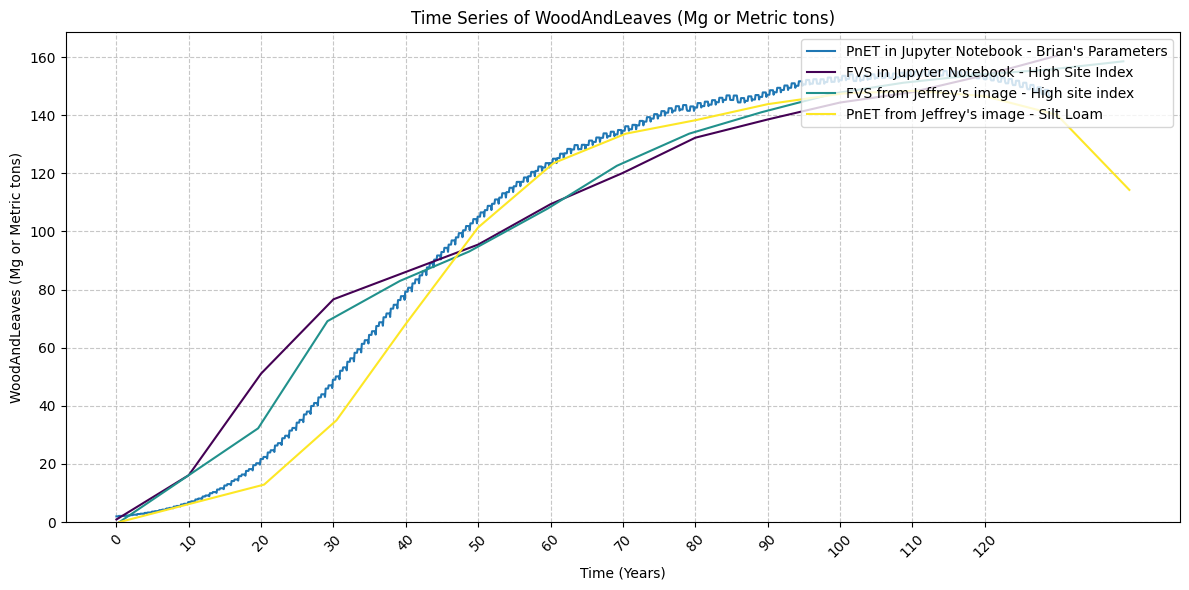

In [12]:
# Trying to reproduce growth curves from Brian's team
# I'm having trouble. Doesn't seem to be due to the version of FVS I'm using; it's the same when downloading it
# from the official website (not github) and using the GUI.

balsamFir_HighSiteIndex = FVS_on_simulationOnSingleEmptyStand(Latitude = 47, # Capital of Minnesota, to approximate where the parameters of this PnET sample scenario were made
                                    Longitude = -93.1022, # Capital of michigan, to approximate where the parameters of this PnET sample scenario were made
                                    Slope = 0, # We want ideal/neutral conditions, so no slope
                                    Elevation = 0, # We want ideal/neutral conditions, so no elevation 
                                    treeSpeciesCode = "BF", # Balsam fir, Abies balsamea. All codes are available at https://github.com/USDAForestService/ForestVegetationSimulator/blob/5c29887e4168fd8182c1b2bad762f900b7d7e90c/canada/on/grinit.f#L43
                                    treesPerHectares = 2471, # To replicate stocking density from  https://cdnsciencepub.com/doi/10.1139/cjfr-2024-0085, supp. mat. A
                                    siteIndex = 40, # High site index for the Balsam fir. See https://www.fs.usda.gov/nrs/pubs/gtr/gtr_nc128.pdf
                                    variant = "FVSls",
                                    Max_BA = 120, # Maximum basal area in stand. VERY IMPORTANT : https://cdnsciencepub.com/doi/10.1139/cjfr-2024-0085, supp. mat. A indicates that biomass groth is really overestimated in FVS unless this maximum is used (see BP 8). Can be found from empirical data (see documents sent by Brian Sturtevant).
                                    timestep = 10,
                                    numberOfTimesteps = 14,
                                    outputFormatBiomass = "Metric tons per hectares",
                                    outputFormatYears = "Start at 0",
                                    folderForFiles = "/calibrationFolder/FVS_SingleEmptyStandRun",
                                    clearFiles = False)

# print(balsamFir_HighSiteIndex) # WARNING : output is total aboveground live biomass in Metric Ton (Mg) per hectare.

# # Data from FVS-PnET_SpeciesCurves.pdf for Balsam fir in FVS with high site index) sent by Brian, extracted with plot digitzer :
# # WARNING : This is old data that wasn't from the right figure, per Jeffrey's words.
# balsamFir_BrianFVSpdf = {
# 0: 186.48018648019206,
# 11.70418006430868: 3263.403263403263,
# 23.408360128617367: 9137.529137529142,
# 35.56270096463022: 12494.172494172497,
# 46.81672025723473: 14731.934731934736,
# 58.5209003215434: 18368.298368298372,
# 70.2250803858521: 21631.701631701635,
# 81.47909967845658: 24055.94405594406,
# 93.18327974276525: 25920.745920745925,
# 105.33762057877811: 27412.587412587418,
# 116.59163987138263: 28251.748251748257,
# 129.19614147909968: 28811.188811188815,
# 140: 29277.38927738928,
# 152.15434083601286: 29836.829836829842
# }

# # Data from FVS-PnET_SpeciesCurves.pdf for Balsam fir in PnET on Silt Loam sent by Brian, extracted with plot digitzer :
# # WARNING : This is old data that wasn't from the right figure, per Jeffrey's words.
# balsamFir_BrianPnETpdf = {
# 0: 186.48018648019206,
# 11.70418006430868: 372.96037296037684,
# 23.858520900321544: 2610.722610722616,
# 35.11254019292604: 8298.368298368303,
# 46.81672025723473: 14825.174825174829,
# 58.070739549839224: 18461.538461538465,
# 70.2250803858521: 21165.50116550117,
# 81.92926045016077: 23216.78321678322,
# 93.18327974276525: 24522.144522144525,
# 104.88745980707395: 25641.025641025644,
# 117.49196141479098: 26013.986013986017,
# 128.2958199356913: 26200.466200466206,
# 140: 26107.22610722611
# }

# Data from a graph sent by Jeffrey (email of the 8 April 2025) for Balsam fir in FVS with high site index) sent by Brian, extracted with plot digitzer :
balsamFir_BrianFVSpdf = {
0.4166666666666643: 0,
19.58333333333333: 32.25806451612908,
29.166666666666657: 69.12442396313367,
39.16666666666667: 82.9493087557604,
48.75: 93.08755760368666,
59.58333333333333: 107.83410138248848,
69.16666666666667: 122.58064516129036,
79.16666666666666: 133.64055299539172,
89.16666666666666: 141.01382488479265,
99.16666666666667: 147.46543778801845,
108.74999999999999: 151.15207373271892,
119.16666666666667: 153.9170506912443,
129.16666666666663: 155.76036866359448,
139.16666666666669: 158.5253456221198
}

# Data from a graph sent by Jeffrey (email of the 8 April 2025) for Balsam fir in PnET on Silt Loam sent by Brian, extracted with plot digitzer :
balsamFir_BrianPnETpdf = {
0.4166666666666643: 0,
20.416666666666664: 12.903225806451587,
30.416666666666657: 35.02304147465435,
40: 68.20276497695852,
50: 101.38248847926269,
60.41666666666666: 123.50230414746545,
70.41666666666666: 133.64055299539172,
79.99999999999999: 138.24884792626727,
90: 143.77880184331804,
100.41666666666667: 147.46543778801845,
110.41666666666667: 148.38709677419354,
119.99999999999999: 146.5437788018433,
130: 140.0921658986175,
140: 114.28571428571433
}


# Add Wood and leaves together to compare to the aboveground biomass of FVS
LANDISIIResults_FromBrianTeam = list(result_sitesCSV_ParametersFromBrian.values())[0]
LANDISIIResults_FromBrianTeam["WoodAndLeaves(gDW)"] = LANDISIIResults_FromBrianTeam["Wood(gDW)"] + LANDISIIResults_FromBrianTeam["Fol(gDW)"]

# We also prepare results from the first sim (with parameters from this notebook, not from Brian's team)
LANDISIIResults_FromSimpleParameters = list(result_sitesCSV_ParametersFromNotebook.values())[0]
LANDISIIResults_FromSimpleParameters["WoodAndLeaves(gDW)"] = LANDISIIResults_FromSimpleParameters["Wood(gDW)"] + LANDISIIResults_FromSimpleParameters["Fol(gDW)"]


resultsList = [{"WoodAndLeaves(gDW)":{"Time":list(balsamFir_HighSiteIndex.keys()), "Values":list(balsamFir_HighSiteIndex.values())}},
              {"WoodAndLeaves(gDW)":{"Time":list(balsamFir_BrianFVSpdf.keys()), "Values":list(balsamFir_BrianFVSpdf.values())}},
              {"WoodAndLeaves(gDW)":{"Time":list(balsamFir_BrianPnETpdf.keys()), "Values":list(balsamFir_BrianPnETpdf.values())}}]
               # Here, we divide the values of the LANDIS-II results from above by 100 to put them in metric tons by hectare rather than by 
              # {"WoodAndLeaves(gDW)":{"Time":[x - 1991 for x in list(LANDISIIResults_FromSimpleParameters["Time"])], "Values":[x/100 for x in list(LANDISIIResults_FromSimpleParameters["WoodAndLeaves(gDW)"])]}}]

plot_TimeSeries_CSV_PnETSitesOutputs(LANDISIIResults_FromBrianTeam,
                                     referenceDict = resultsList,
                                     columnToPlotSelector = ["WoodAndLeaves(gDW)"],
                                     trueTime = False,
                                     realBiomass = True,
                                     cellLength = int(PnETGitHub_OneCellSim["scenario.txt"]["CellLength"]),
                                     referenceLabel = ["FVS in Jupyter Notebook - High Site Index",
                                                     "FVS from Jeffrey's image - High site index",
                                                     "PnET from Jeffrey's image - Silt Loam"],
                                    labelOfFirstCurve = "PnET in Jupyter Notebook - Brian's Parameters")


###################
# TO DO NOW
# Try permutations of Max basal area or other FVS parameters to try to make the FVS curve
# From the notebook (purple) match the one from Jeffrey's image
# Try to use data and guidance from FVS-Guide-ForGLRI that Brian sent.
# Try to understand what is missing; once you do, try to do things in FVSon to see what you get.
##################

I can't even make the curve of PnET match the one in Brian's .pdf, even though we're using the same species parameters, climate parameters, the 100 Silt Loam soil and everything. What's going on ?

Next : try to display curve I have with the Initial parameters I found versus the parameters of Brian. And if nothing work, send the files of PnET + the files of FVS to Brian for questions. And then edit the functions as noted, and keep going with the calibration process while waiting for an answer.

NEXT :

- Find out how to replicate the figures of Brian's team
- Try to validate the results of FVSon once I know more about what's going on


The problem : The curve of FVS is VERY influenced by the site index and by the maximum basal area. But it's hard to get this data from empirical data !

But it's not completly impossible either. In any case, we should not use the values used by Brian's team, since these values represent the  maximum densities that the species were able to reach in their study region; and the site index also represent things possible in their study region.

While it is tempting to say that the parameters of Brian's team can be used in other areas because the parameters of PnET should generate the right vegetation dynamics in another region as long as we change the parameters of the abiotic environment, I don't think it's true. It's because what these parameters represent are not the physiology of a species throughout the world, but of the species in its local region. Species are an abstract notion, and nature is more complex; there can be a lot of intra-specific variation due to many factors. If we don't calibrate on empirical data or empirical models from the study area, we will miss this intra-specific variation, and we might get the wrong results.

Possibilities :
- Switch to using pure empirical data to calibrate PnET : Sample plot data and local yield curve expressed in tons per hectare, or grams per m2 through time. Doable, but will require a lot of data cleaning and adaptation for different data sets throughout the different provinces.
- Use FVS ontario, but derive site index and maximal basal area from empirical data as Brian's team did. But we will get into more troubles as we move away from Ontario and Quebec (where FVS ontario has been calibrated and tested).
    - We can also use the best we can for each region; i.e. use FVSon for Ontario and Quebec, and then see if the parameters we derive from there fits the growth curves in other provinces pretty well. FVSon still has the huge advantage of helping us to get an idea of what the dynamic in a monoculture looks like.
    - Ameray et al. said that they had mean site index data from the NFI. I can't find them, but that would help tremendously.

Next :

- Ask Jesus if we can have box plots of Biomass (or merchentable volume) by year in our PSPs and TSPs that have a lot of the species of consideration (we can use the percentiles of the box plot to have a good idea of where to put the curve
- Ask Jesus if he could help to find the Site Index for our sites, as well as the Maximum Basal Area based on Brian's methodology
- Ask Jesus what approach he would think is the best
- Ask Ameray where he got their site index data

(Waiting for answers)

Notes : 

- FVSon with these parameters seems to end up matching the FVS curve from Brian on site index at the end (140 years). Might be good for a start !

```python
balsamFir_HighSiteIndex = FVS_on_simulationOnSingleEmptyStand(Latitude = 44.9551, # Capital of Minnesota, to approximate where the parameters of this PnET sample scenario were made
                                    Longitude = -93.1022, # Capital of michigan, to approximate where the parameters of this PnET sample scenario were made
                                    Slope = 0, # We want ideal/neutral conditions, so no slope
                                    Elevation = 0, # We want ideal/neutral conditions, so no elevation 
                                    treeSpeciesCode = "BF", # Balsam fir, Abies balsamea. All codes are available at https://github.com/USDAForestService/ForestVegetationSimulator/blob/5c29887e4168fd8182c1b2bad762f900b7d7e90c/canada/on/grinit.f#L43
                                    treesPerHectares = 2471, # To replicate stocking density from  https://cdnsciencepub.com/doi/10.1139/cjfr-2024-0085, supp. mat. A
                                    siteIndex = 62.5, # High site index for the Balsam fir. See https://www.fs.usda.gov/nrs/pubs/gtr/gtr_nc128.pdf
                                    variant = "FVSls",
                                    Max_BA = 170, # Maximum basal area in stand. VERY IMPORTANT : https://cdnsciencepub.com/doi/10.1139/cjfr-2024-0085, supp. mat. A indicates that biomass groth is really overestimated in FVS unless this maximum is used (see BP 8). Can be found from empirical data (see documents sent by Brian Sturtevant).
                                    timestep = 10,
                                    numberOfTimesteps = 14,
                                    outputFormatBiomass = "Metric gram per meter squared",
                                    outputFormatYears = "Start at 0",
                                    folderForFiles = "/calibrationFolder/FVS_SingleEmptyStandRun",
                                    clearFiles = False)
```

From [here](https://publications.gc.ca/collections/collection_2008/nrcan/Fo113-3-132E.pdf) : Interesting differences between FVSls (used by Brian's team) and FVSon.

> In particular, predicted mortality rates were much greater than observed and errors between predicted and observed diameter at breast height (dbh) growth estimates were relatively large (Lacerte et al. 2004). Based on these results, a calibration exercise was undertaken to adapt FVS for Ontario’s forest conditions.

So, more mortality and wrong prediction of FVSls for the forests of Ontario. I imagine that means that FVSon should show more growth when compared to FVSls ?

Also of not from the same source :

> Site index was excluded for planted black spruce, balsam fir, planted white spruce, trembling aspen and white birch because no model form resulted in significant parameters for this independent variable.

Might explain why Site Index doesn't have a big effect (or even no effect at all) on predictions for Balsam fir.

From [here](https://linkinghub.elsevier.com/retrieve/pii/S0304380006002341) : they used data from the sample plots of Quebec for validation of the calibration of FVSon.

> Despite the fact that the residuals were greater than the residuals computed for the same models with the Ontario dataset, nevertheless these results suggest that the new calibrated models were well adapted for Quebec’s conditions. This is supported by the relatively low MPDs obtained for the different models (Tables 7 and 8), which compared favorably well to MPDs computed previously using the Ontario data (Lacerte et al., 2004). The fact that the mean residuals were generally greater in the Quebec dataset than in the Ontario dataset may be explained by differences in ecological conditions, including soil and climatic conditions. Hence, these results also suggest that the derivation of species-specific growth models for growth prediction over large regions must include some form of representation of the differences in local ecological characteristics.

In [ ]:
# First draft of code to find GCM closest to median accross the 26 GCMs available in CanDCS-M6

from functionsForCalibration import *
from siphon.catalog import TDSCatalog
import xarray as xr
from dask.diagnostics import ProgressBar
from IPython.display import display
from clisops.core import subset
import pandas as pd
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from datetime import datetime
from matplotlib.colors import to_rgba
    
# These URLs was made by browsing the THREDD server catalog of datasets, as was recommanded to me by email by the Canadian Centre for Climate Services (ECCC
# It points to the location of monthly total precipitation, Monthly tmax and tmin data for CanDCS-M6, and climate scenario SSP126.
# Here, we are in a folder with 26 different .nc files, corresponding to different GCMs runs
# We will loop to display each of them on a plot
dictOfVariablesURL = {"prcptot":"https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/catalog/birdhouse/disk2/cccs_portal/indices/Final/CanDCS-M6/prcptot/MS/ssp126/simulations/catalog.xml",
                     "tn_min":"https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/catalog/birdhouse/disk2/cccs_portal/indices/Final/CanDCS-M6/tn_min/MS/ssp126/simulations/catalog.xml",
                     "tx_max":"https://pavics.ouranos.ca/twitcher/ows/proxy/thredds/catalog/birdhouse/disk2/cccs_portal/indices/Final/CanDCS-M6/tx_max/MS/ssp126/simulations/catalog.xml"}

for variable in dictOfVariablesURL:
    # Create Catalog object
    cat = TDSCatalog(dictOfVariablesURL[variable])
    
    # Lists the datasets in the catalog
    print(f"Number of datasets: {len(cat.datasets)}")
    
    # Create dictionnary to fill with values
    variableMonthlyDict = dict()
    
    for datasetID in range(0, len(cat.datasets)):
        # Selects the dataset
        cds = cat.datasets[datasetID]
        # Gets the model name from the .nc file name
        modelName = str(cds).replace("_historical+ssp126_1950-2100.nc", "").replace(variable + "_mon_MBCn+PCIC-Blend_", "")
        # Get the data for the Chapleau area
        ds = xr.open_dataset(cds.access_urls["OPENDAP"], chunks="auto")
        ds1 = subset.subset_shape(ds,
                                  shape="./ReferencesAndData/ChapleauBoundariesClimate.shp")
        ds_months = ds1[variable].isel(time=slice(0, 1812))
        # With this command, we can get the monthly averages across all cells in one very quick step
        # Instead of going from month to month with listOfPrecTotMonthly.append(float(testds.isel(time=month).mean().values))
        # Here, we use mean() to get the mean values accross all of the  cells in our polygon.
        # This works for precipitations too as mm are not dependent on the surface; 1mm of precipitation = 1l per m2. PnET takes
        # the same unit, so it's OK.
        listOVariableMonthly = ds_months.mean(dim=['lat', 'lon']).values.tolist()
        # We put the values in the dictionnary
        variableMonthlyDict[modelName] = listOVariableMonthly
    
    # We create the list of years/months to plot
    years = np.repeat(np.arange(1950, 2101), 12)
    # Create months 1-12 for each year
    months = np.tile(np.arange(1, 13), 2101-1950)
    datesTime = [(str(year) + "-" + str(month).zfill(2) + "-01") for (month, year) in zip(months, years)]
    
    # This function is in functionsForCalibration.py
    plot_climateVariable_time_series_with_moving_average(variableMonthlyDict, datesTime, variable, 50, "EC-Earth3-Veg")

## First attemps of GAMS in Python

Fitting GAM model...
AIC: 125723.04
Deviance explained: 0.760
Zero constraint offset: 1.173


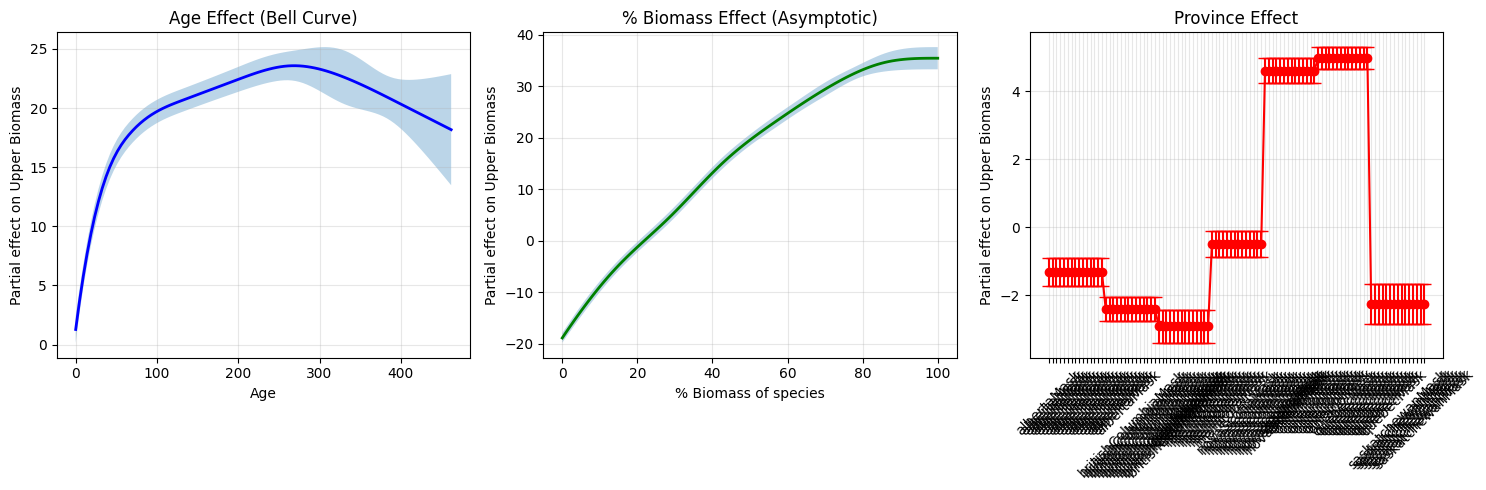

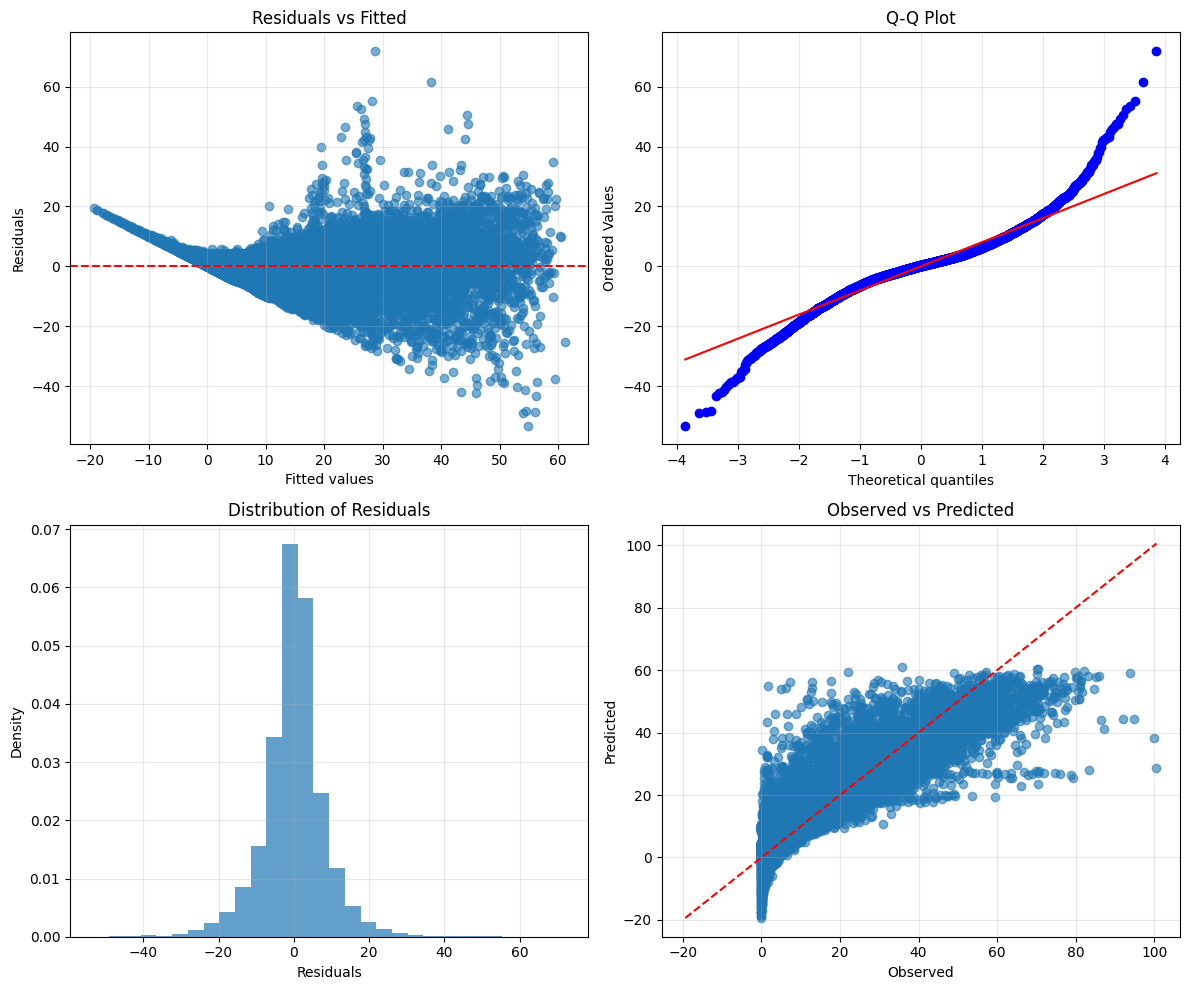

Model Performance Metrics:
RMSE: 8.2935
MAE: 5.7490
R²: 0.7602


In [1]:
# Now, we create a Generalized Additive Model based on the Upper Biomass data we exported.
# The GAM predicts upper biomass as a function of pixel age, province, and % of abundance of the species.
import pandas as pd
import numpy as np
from pygam import LinearGAM, s, f
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

def create_gam_model(combined_df):
    """
    Concatenate dataframes and create GAM model with constrained effects
    """

    # Prepare data for GAM
    # Encode Province as categorical
    le = LabelEncoder()
    combined_df['Province_encoded'] = le.fit_transform(combined_df['Province'])-

    # Prepare features
    X = combined_df[['Age', '% Biomass of species', 'Province_encoded']].values
    y = combined_df['Upper Biomass value'].values

    # Create GAM with constrained effects and no intercept
    gam = LinearGAM(
        # Age: bell curve (concave constraint)
        s(0, n_splines=10, constraints='concave') +
        # % Biomass of species: asymptotic curve (monotonic increasing with concave constraint)
        s(1, n_splines=10, constraints='monotonic_inc') +
        # Province: categorical factor
        f(2),
        fit_intercept=False  # No global intercept
    )

    # Fit the model
    print("Fitting GAM model...")
    gam.fit(X, y)

    # Print model summary
    print(f"AIC: {gam.statistics_['AIC']:.2f}")
    print(f"Deviance explained: {gam.statistics_['pseudo_r2']['explained_deviance']:.3f}")

    return gam, combined_df, le

def plot_gam_effects(gam, combined_df, le, save_plots=False):
    """
    Plot partial effects of GAM model
    """

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot Age effect (bell curve)
    XX = gam.generate_X_grid(term=0, n=100)
    pdep, confi = gam.partial_dependence(term=0, X=XX, width=0.95)

    axes[0].plot(XX[:, 0], pdep, 'b-', linewidth=2, label='Age effect')
    axes[0].fill_between(XX[:, 0], confi[:, 0], confi[:, 1], alpha=0.3)
    axes[0].set_xlabel('Age')
    axes[0].set_ylabel('Partial effect on Upper Biomass')
    axes[0].set_title('Age Effect (Bell Curve)')
    axes[0].grid(True, alpha=0.3)

    # Plot % Biomass of species effect (asymptotic)
    XX = gam.generate_X_grid(term=1, n=100)
    pdep, confi = gam.partial_dependence(term=1, X=XX, width=0.95)

    axes[1].plot(XX[:, 1], pdep, 'g-', linewidth=2, label='% Biomass effect')
    axes[1].fill_between(XX[:, 1], confi[:, 0], confi[:, 1], alpha=0.3)
    axes[1].set_xlabel('% Biomass of species')
    axes[1].set_ylabel('Partial effect on Upper Biomass')
    axes[1].set_title('% Biomass Effect (Asymptotic)')
    axes[1].grid(True, alpha=0.3)

    # Plot Province effect
    XX = gam.generate_X_grid(term=2)
    pdep, confi = gam.partial_dependence(term=2, X=XX, width=0.95)

    province_names = le.inverse_transform(XX[:, 2].astype(int))
    axes[2].errorbar(range(len(province_names)), pdep, 
                     yerr=[pdep - confi[:, 0], confi[:, 1] - pdep], 
                     fmt='ro-', capsize=5)
    axes[2].set_xticks(range(len(province_names)))
    axes[2].set_xticklabels(province_names, rotation=45)
    axes[2].set_ylabel('Partial effect on Upper Biomass')
    axes[2].set_title('Province Effect')
    axes[2].grid(True, alpha=0.3)

    plt.tight_layout()

    if save_plots:
        plt.savefig('gam_effects.png', dpi=300, bbox_inches='tight')

    plt.show()

def predict_biomass(gam, age, biomass_percent, province, le):
    """
    Make predictions for new data
    """

    # Encode province
    try:
        province_encoded = le.transform([province])[0]
    except ValueError:
        print(f"Province '{province}' not found in training data")
        return None

    # Prepare input
    X_new = np.array([[age, biomass_percent, province_encoded]])

    # Make prediction
    prediction = gam.predict(X_new)[0]
    confidence_interval = gam.prediction_intervals(X_new, width=0.95)[0]

    return {
        'prediction': prediction,
        'lower_ci': confidence_interval[0],
        'upper_ci': confidence_interval[1]
    }

def model_diagnostics(gam, X, y):
    """
    Generate model diagnostic plots
    """

    # Predictions
    y_pred = gam.predict(X)
    residuals = y - y_pred

    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Residuals vs Fitted
    axes[0, 0].scatter(y_pred, residuals, alpha=0.6)
    axes[0, 0].axhline(y=0, color='r', linestyle='--')
    axes[0, 0].set_xlabel('Fitted values')
    axes[0, 0].set_ylabel('Residuals')
    axes[0, 0].set_title('Residuals vs Fitted')
    axes[0, 0].grid(True, alpha=0.3)

    # Q-Q plot
    from scipy import stats
    stats.probplot(residuals, dist="norm", plot=axes[0, 1])
    axes[0, 1].set_title('Q-Q Plot')
    axes[0, 1].grid(True, alpha=0.3)

    # Histogram of residuals
    axes[1, 0].hist(residuals, bins=30, density=True, alpha=0.7)
    axes[1, 0].set_xlabel('Residuals')
    axes[1, 0].set_ylabel('Density')
    axes[1, 0].set_title('Distribution of Residuals')
    axes[1, 0].grid(True, alpha=0.3)

    # Observed vs Predicted
    axes[1, 1].scatter(y, y_pred, alpha=0.6)
    min_val = min(y.min(), y_pred.min())
    max_val = max(y.max(), y_pred.max())
    axes[1, 1].plot([min_val, max_val], [min_val, max_val], 'r--')
    axes[1, 1].set_xlabel('Observed')
    axes[1, 1].set_ylabel('Predicted')
    axes[1, 1].set_title('Observed vs Predicted')
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Calculate metrics
    rmse = np.sqrt(np.mean(residuals**2))
    mae = np.mean(np.abs(residuals))
    r2 = 1 - np.sum(residuals**2) / np.sum((y - np.mean(y))**2)

    print(f"Model Performance Metrics:")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")


# Assuming you have a list of dataframes from different provinces
# dataframes_list = [df_province1, df_province2, df_province3, ...]

combined_df = pd.read_csv("testCSVGAM.csv")

# Create and fit GAM model
gam_model, combined_data, label_encoder = create_gam_model(combined_df)

# Plot effects
plot_gam_effects(gam_model, combined_data, label_encoder, save_plots=True)

# Model diagnostics
X = combined_data[['Age', '% Biomass of species', 'Province_encoded']].values
y = combined_data['Upper Biomass value'].values
model_diagnostics(gam_model, X, y)

# Example prediction
# result = predict_biomass(gam_model, age=15, biomass_percent=25, 
#                        province="your_province_name", le=label_encoder)
# if result:
#     print(f"\nPrediction for Age=15, Biomass%=25:")
#     print(f"Upper Biomass Value: {result['prediction']:.4f}")
#     print(f"95% CI: [{result['lower_ci']:.4f}, {result['upper_ci']:.4f}]")

Since the % of abundance of the species has such a strong effect on the growth peak and its position, we need to be able to estimate what happens with an abundance of 100% (if the species was alone).

To do this, we're going to make a Generalized Additive Model (GAM) that predicts the Upper biomass values for each age window of 3 year, for a given province and for a given % of abundance the species. See the following image for details :

![image.png](attachment:d594888f-1c96-4073-9fea-3882489884f3.png)

In [ ]:
# Now, just like on the image above, we're going to transform the point/pixel values of the raster into a dataframe
# where each row is a value of Upper Biomass value for a given Province, age window and % of local abundance for the species.
# WARNING : This cell takes quite a lot of RAM (around 10GB), and might crash your Docker container if it exceeds the RAM on your computer.
from functionsForCalibration import *

species_path = "./ReferencesAndData//NFI_Data/NFI_MODIS250m_2011_kNN_Species_Abie_Bal_v1.tif"
age_path = "./ReferencesAndData//NFI_Data/NFI_MODIS250m_2011_kNN_Structure_Stand_Age_v1.tif"
biomass_path = "./ReferencesAndData//NFI_Data/NFI_MODIS250m_2011_kNN_Structure_Biomass_TotalLiveAboveGround_v1.tif"
# mask_path = "./ReferencesAndData/ontarioMask.tif"

dictOfMasks = {"NS":"./ReferencesAndData/SpatialBoundaries/novaScotiaMask.tif",
              "QB":"./ReferencesAndData/SpatialBoundaries/quebecMask.tif",
              "ON":"./ReferencesAndData/SpatialBoundaries/ontarioMask.tif",
              "MT":"./ReferencesAndData/SpatialBoundaries/manitobaMask.tif",
              "SK":"./ReferencesAndData/SpatialBoundaries/saskatchewanMask.tif",
              "AB":"./ReferencesAndData/SpatialBoundaries/albertaMask.tif",
              "BC":"./ReferencesAndData/SpatialBoundaries/britishColumbiaMask.tif",}

# Process rasters and create dataframe
dictOfResultDataframes = dict()
for province in dictOfMasks.keys():
    dictOfResultDataframes[province] = processNFI_RastersIntoDataFrameForGAM(age_path, biomass_path, species_path, dictOfMasks[province])

# Display results
# print(f"Generated dataframe with {len(result_df)} rows")
# print(result_df.head())

/calibrationFolder/calibrationJupyterBook/StartingCalibrationTest/functionsForCalibration.py:3807: RuntimeWarning: invalid value encountered in cast
  age_rounded = age_rounded.astype(np.int32)
/calibrationFolder/calibrationJupyterBook/StartingCalibrationTest/functionsForCalibration.py:3813: RuntimeWarning: overflow encountered in multiply
  species_biomass = biomass_data * (abundance_data / 100.0)


Processing 154036356 valid pixels in chunks of 1000000


Processing chunks:  72%|████████████████████████████████████████████▊                 | 112/155 [04:12<17:07, 23.89s/it]

In [2]:
# We combine the data frame for each province together, and we export them as a single .csv file
combined_df = pd.concat(dictOfResultDataframes.values(), ignore_index=True)
combined_df.to_csv("./ReferencesAndData/NFI_UpperBiomass_PerProvince_AbiesBalsamea.csv")

Generating predictions for 7 provinces
Age range: 0 to 348 years (117 points)
Biomass percentage: 100%
  albertaMask: predictions range from 36.6026 to 58.9068
  britishColumbiaMask: predictions range from 35.5220 to 57.8262
  manitobaMask: predictions range from 35.0090 to 57.3133
  novaScotiaMask: predictions range from 37.4349 to 59.7392
  ontarioMask: predictions range from 42.5347 to 64.8389
  quebecMask: predictions range from 42.8994 to 65.2036
  saskatchewanMask: predictions range from 35.6742 to 57.9784

Generated dictionary with 7 provinces:
  albertaMask: 117 predictions
  britishColumbiaMask: 117 predictions
  manitobaMask: 117 predictions
  novaScotiaMask: 117 predictions
  ontarioMask: 117 predictions
  quebecMask: 117 predictions
  saskatchewanMask: 117 predictions
Predictions saved to biomass_predictions.csv


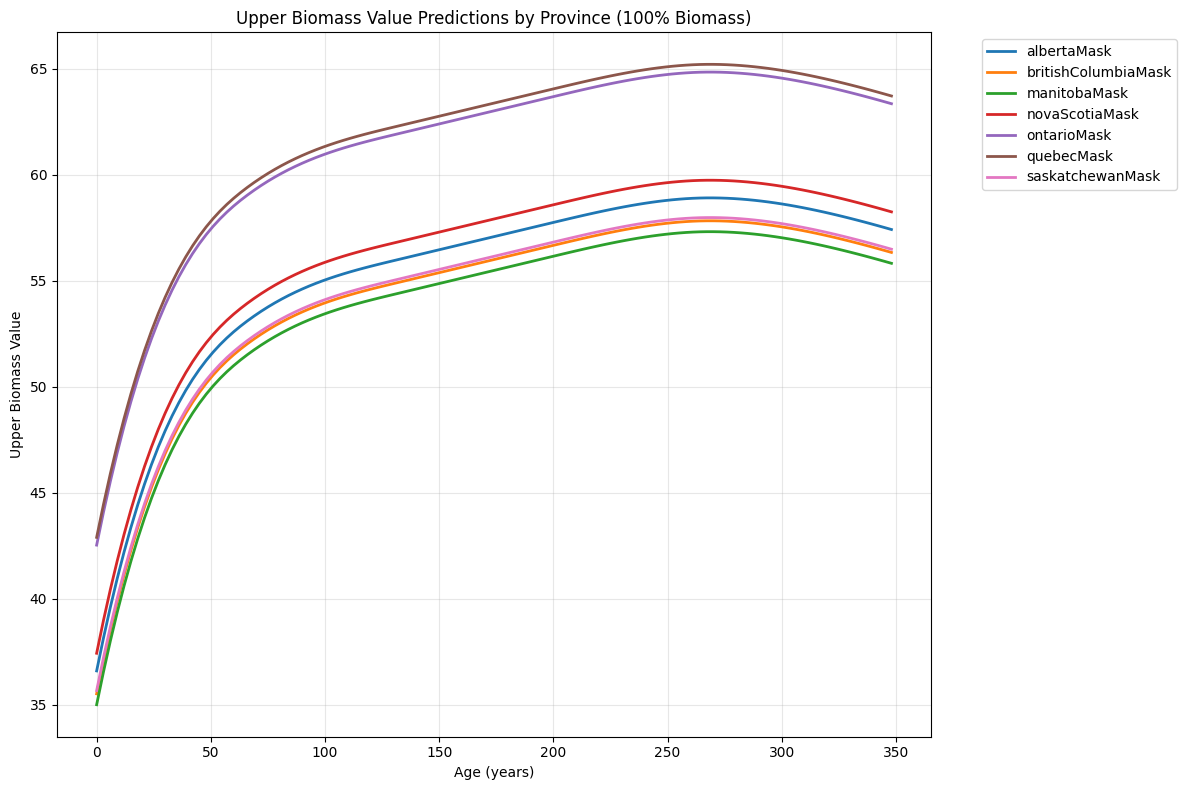


Peak biomass ages by province:
  albertaMask: Age 270 (Value: 58.9068)
  britishColumbiaMask: Age 270 (Value: 57.8262)
  manitobaMask: Age 270 (Value: 57.3133)
  novaScotiaMask: Age 270 (Value: 59.7392)
  ontarioMask: Age 270 (Value: 64.8389)
  quebecMask: Age 270 (Value: 65.2036)
  saskatchewanMask: Age 270 (Value: 57.9784)


In [2]:
import numpy as np

def generate_biomass_predictions_dict(gam_model, label_encoder, biomass_percent=100):
    """
    Generate dictionary with Upper Biomass Value predictions for each province

    Parameters:
    - gam_model: fitted GAM model
    - label_encoder: fitted LabelEncoder for provinces
    - biomass_percent: percentage of biomass (default 100%)

    Returns:
    - Dictionary with province names as keys and lists of predictions as values
    """

    # Generate age range from 0 to 350 in 3-year increments
    ages = np.arange(0, 351, 3)  # 0, 3, 6, 9, ..., 348

    # Get all province names
    province_names = label_encoder.classes_

    # Initialize results dictionary
    predictions_dict = {}

    print(f"Generating predictions for {len(province_names)} provinces")
    print(f"Age range: {ages[0]} to {ages[-1]} years ({len(ages)} points)")
    print(f"Biomass percentage: {biomass_percent}%")

    # Generate predictions for each province
    for province in province_names:
        # Encode province
        province_encoded = label_encoder.transform([province])[0]

        # Create input matrix for all ages for this province
        X_province = np.column_stack([
            ages,                                    # Age column
            np.full(len(ages), biomass_percent),    # Biomass % column (all 100%)
            np.full(len(ages), province_encoded)    # Province column (encoded)
        ])

        # Make predictions
        predictions = gam_model.predict(X_province)

        # Store in dictionary
        predictions_dict[province] = predictions.tolist()

        print(f"  {province}: predictions range from {predictions.min():.4f} to {predictions.max():.4f}")

    return predictions_dict, ages

def save_predictions_to_csv(predictions_dict, ages, filename="biomass_predictions.csv"):
    """
    Save predictions dictionary to CSV file
    """
    import pandas as pd

    # Create DataFrame
    df_predictions = pd.DataFrame(predictions_dict)
    df_predictions.insert(0, 'Age', ages)

    # Save to CSV
    df_predictions.to_csv(filename, index=False)
    print(f"Predictions saved to {filename}")

    return df_predictions

def plot_predictions_by_province(predictions_dict, ages, save_plot=False):
    """
    Plot predictions for all provinces
    """
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 8))

    # Plot each province
    for province, predictions in predictions_dict.items():
        plt.plot(ages, predictions, label=province, linewidth=2)

    plt.xlabel('Age (years)')
    plt.ylabel('Upper Biomass Value')
    plt.title('Upper Biomass Value Predictions by Province (100% Biomass)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()

    if save_plot:
        plt.savefig('biomass_predictions_by_province.png', dpi=300, bbox_inches='tight')

    plt.show()

def get_peak_ages(predictions_dict, ages):
    """
    Find the age at which each province reaches peak biomass
    """
    peak_info = {}

    for province, predictions in predictions_dict.items():
        predictions_array = np.array(predictions)
        peak_idx = np.argmax(predictions_array)
        peak_age = ages[peak_idx]
        peak_value = predictions_array[peak_idx]

        peak_info[province] = {
            'peak_age': peak_age,
            'peak_value': peak_value
        }

    return peak_info


# Assuming you have your fitted GAM model and label encoder
# gam_model, combined_data, label_encoder = create_gam_model(dataframes_list)

# Generate predictions dictionary
biomass_dict, age_range = generate_biomass_predictions_dict(
    gam_model, label_encoder, biomass_percent=100
)

# Display structure
print(f"\nGenerated dictionary with {len(biomass_dict)} provinces:")
for province, predictions in biomass_dict.items():
    print(f"  {province}: {len(predictions)} predictions")

# Example: Access predictions for a specific province
# first_province = list(biomass_dict.keys())[0]
# print(f"\nFirst 10 predictions for {first_province}:")
# print(biomass_dict[first_province][:10])

# Save to CSV
df_results = save_predictions_to_csv(biomass_dict, age_range)

# Plot results
plot_predictions_by_province(biomass_dict, age_range, save_plot=True)

# Find peak ages
peak_ages = get_peak_ages(biomass_dict, age_range)
print(f"\nPeak biomass ages by province:")
for province, info in peak_ages.items():
    print(f"  {province}: Age {info['peak_age']} (Value: {info['peak_value']:.4f})")


In [12]:
# We read data from the NFI for our free species, and plot the distribution of the points above the 99th percentile

from functionsForCalibration import *
import matplotlib.pyplot as plt

species_path = "./ReferencesAndData//NFI_Data/NFI_MODIS250m_2011_kNN_Species_Abie_Bal_v1.tif"
age_path = "./ReferencesAndData//NFI_Data/NFI_MODIS250m_2011_kNN_Structure_Stand_Age_v1.tif"
biomass_path = "./ReferencesAndData//NFI_Data/NFI_MODIS250m_2011_kNN_Structure_Biomass_TotalLiveAboveGround_v1.tif"
# mask_path = "./ReferencesAndData/ontarioMask.tif"

dictOfMasks = {"NS":"./ReferencesAndData/SpatialBoundaries/novaScotiaMask.tif",
              "QB":"./ReferencesAndData/SpatialBoundaries/quebecMask.tif",
              "ON":"./ReferencesAndData/SpatialBoundaries/ontarioMask.tif",
              "MT":"./ReferencesAndData/SpatialBoundaries/manitobaMask.tif",
              "SK":"./ReferencesAndData/SpatialBoundaries/saskatchewanMask.tif",
              "AB":"./ReferencesAndData/SpatialBoundaries/albertaMask.tif",
              "BC":"./ReferencesAndData/SpatialBoundaries/britishColumbiaMask.tif",}

# dictOfMasks = {"East":["./ReferencesAndData/novaScotiaMask.tif", "./ReferencesAndData/quebecMask.tif", "./ReferencesAndData/ontarioMask.tif"],
#               "West":["./ReferencesAndData/manitobaMask.tif", "./ReferencesAndData/saskatchewanMask.tif", "./ReferencesAndData/albertaMask.tif", "./ReferencesAndData/britishColumbiaMask.tif"]}

dictOfResults = {"NS":"",
              "QB":"",
              "ON":"",
              "MT":"",
              "SK":"",
              "AB":"",
              "BC":"",}

with rasterio.open(species_path) as src_species:
    with rasterio.open(age_path) as src_age:
        with rasterio.open(biomass_path) as src_biomass:
            print("Reading species raster...")
            species_data = src_species.read(1)
            profile = src_species.profile
            print("Reading age raster...")
            age_data = src_age.read(1)
            print("Reading biomass raster...")
            biomass_data = src_biomass.read(1)
        
            for province in dictOfMasks:
                # Process the rasters
                print("Dealing with "+ str(province))
                age_sample, abies_biomass_sample = process_NFI_rasters_to_arraysForPlot(
                    species_data, age_data, biomass_data, dictOfMasks[province], thresholdMaximumBiomass = 0.90, thresholdMinimumPercentBiomass = 0, verbose = True
                )
                # Convert the tons per hectares of the values into g/m2 for easy comparison with LANDIS-II outputs
                abies_biomass_sample = abies_biomass_sample * 100
                # Save the results
                dictOfResults[province] = [age_sample, abies_biomass_sample]

Reading species raster...
Reading age raster...
Reading biomass raster...
Dealing with NS


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


Total pixels after initial masking: 844,874
Pixels with non-zero species biomass: 844,874
Age range: 0 - 222 years
Dealing with QB
Total pixels after initial masking: 14,477,719
Pixels with non-zero species biomass: 14,477,719
Age range: 0 - 202 years
Dealing with ON


KeyboardInterrupt: 

In [ ]:
dictOfMasksReversed = {"./ReferencesAndData/SpatialBoundaries/novaScotiaMask.tif":"NS",
                      "./ReferencesAndData/SpatialBoundaries/quebecMask.tif":"QB",
                      "./ReferencesAndData/SpatialBoundaries/ontarioMask.tif":"ON",
                      "./ReferencesAndData/SpatialBoundaries/manitobaMask.tif":"MT",
                      "./ReferencesAndData/SpatialBoundaries/saskatchewanMask.tif":"SK",
                      "./ReferencesAndData/SpatialBoundaries/albertaMask.tif":"AB",
                      "./ReferencesAndData/SpatialBoundaries/britishColumbiaMask.tif":"BC"}


# Create the scatter plot
# Get the current color cycle
from itertools import cycle
colours = cycle(['#a3be8c', '#5e81ac', '#bf616a', '#d08770', '#ebcb8b', '#2e3440', '#8fbcbb'])
plt.figure(figsize=(10, 8))
agesPredictions = np.arange(0, 351, 3)
for province in dictOfResults:
    colour = next(colours)
    plt.scatter(dictOfResults[province][0], dictOfResults[province][1], alpha=0.6, s=8, c=colour, label = province)
    plt.plot(agesPredictions, [x*100 for x in biomass_dict[dictOfMasks[province].split("/")[-1][:-4]]], label=province, c=colour, linewidth=2)
plt.xlabel('Forest Age (years)')
plt.ylabel('Abies Balsamea Biomass (g/m2)')
plt.title(f'Relationship between Forest Age and Abies Balsamea Biomass - all cells with some Abies Balsamea biomass')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.savefig('age_vs_abies_biomass.png', dpi=300)
plt.show()